In [1]:
# Import modules
%matplotlib inline

import os

import time
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier 
from urllib.request import urlopen 

plt.style.use('ggplot')
pd.set_option('display.max_columns', 500) 

### Input uploading & Parameter Grid Search

In [2]:
bucket_root = os.environ['WORKSPACE_BUCKET']
print(bucket_root)


gs://fc-0a6f0af0-7c38-45d2-9faa-2ab086ec0b09


In [3]:
# find out the path to file by running gsutil commandline tool.

!gsutil ls gs://fc-0a6f0af0-7c38-45d2-9faa-2ab086ec0b09/Inputs_Classification
    
!gsutil ls gs://fc-0a6f0af0-7c38-45d2-9faa-2ab086ec0b09/Kenny200\ high\ accuracy\ data\ and\ notebook

gs://fc-0a6f0af0-7c38-45d2-9faa-2ab086ec0b09/Inputs_Classification/
gs://fc-0a6f0af0-7c38-45d2-9faa-2ab086ec0b09/Inputs_Classification/EvMutation_Round_One_Georgiev.csv
gs://fc-0a6f0af0-7c38-45d2-9faa-2ab086ec0b09/Inputs_Classification/EvMutation_Round_One_MSA.csv
gs://fc-0a6f0af0-7c38-45d2-9faa-2ab086ec0b09/Inputs_Classification/EvMutation_Round_One_ONEHOT.csv
gs://fc-0a6f0af0-7c38-45d2-9faa-2ab086ec0b09/Inputs_Classification/x2Gx.csv
gs://fc-0a6f0af0-7c38-45d2-9faa-2ab086ec0b09/Inputs_Classification/x2Gx_Complete.csv
gs://fc-0a6f0af0-7c38-45d2-9faa-2ab086ec0b09/Inputs_Classification/x2Mx.csv
gs://fc-0a6f0af0-7c38-45d2-9faa-2ab086ec0b09/Inputs_Classification/x2Mx_Complete.csv
gs://fc-0a6f0af0-7c38-45d2-9faa-2ab086ec0b09/Inputs_Classification/x2Ox.csv
gs://fc-0a6f0af0-7c38-45d2-9faa-2ab086ec0b09/Inputs_Classification/x2Ox_Complete.csv
gs://fc-0a6f0af0-7c38-45d2-9faa-2ab086ec0b09/Inputs_Classification/x2xx_Structure_Input.csv
gs://fc-0a6f0af0-7c38-45d2-9faa-2ab086ec0b09/Inputs_Classific

In [4]:
fileName = "x6Gx.csv"

## use the above file location information in the bucket
bucket_loc = "gs://fc-0a6f0af0-7c38-45d2-9faa-2ab086ec0b09/Inputs_Classification/"
!gsutil cp gs://fc-0a6f0af0-7c38-45d2-9faa-2ab086ec0b09/Inputs_Classification/x6Gx.csv x6Gx.csv
    
input_df = pd.read_csv(fileName)
print ("(INFO) input uploaded\n")

input_df

Copying gs://fc-0a6f0af0-7c38-45d2-9faa-2ab086ec0b09/Inputs_Classification/x6Gx.csv...
/ [1 files][ 67.6 KiB/ 67.6 KiB]                                                
Operation completed over 1 objects/67.6 KiB.                                     
(INFO) input uploaded



id Binding        G1        G2        G3        G4        G5        G6  \
0   VIAA       B  1.179803  0.013863 -0.299514  1.046624  0.286280 -0.925986   
1   AYGM       B  0.254380  1.507450 -1.636151  1.046624 -0.478625 -0.205601   
2   VFGV       B  1.179803  0.013863 -0.299514  1.046624  0.286280 -0.925986   
3   VHFA       B  1.179803  0.013863 -0.299514  1.046624  0.286280 -0.925986   
4   VHGL       B  1.179803  0.013863 -0.299514  1.046624  0.286280 -0.925986   
..   ...     ...       ...       ...       ...       ...       ...       ...   
91  LNQV       N  1.215568  0.841149  0.858309  2.383405  0.035785  0.013647   
92  VDDF       N  1.179803  0.013863 -0.299514  1.046624  0.286280 -0.925986   
93  ATPV       N  0.254380  1.507450 -1.636151  1.046624 -0.478625 -0.205601   
94  TDGR       N -0.291039 -0.715044 -0.621380  0.282110  0.603872 -1.122862   
95  AATV       N  0.254380  1.507450 -1.636151  1.046624 -0.478625 -0.205601   

          G7        G8        G9       G10       G11       G12       G13  \
0  -0.148027  1.758159 -0.093955  0.567779  0.191844 -0.764365 -1.310016   
1   0.549622 -1.037540 -0.899283  0.585669 -0.510243  0.085178  0.742544   
2  -0.148027  1.758159 -0.093955  0.567779  0.191844 -0.764365 -1.310016   
3  -0.148027  1.758159 -0.093955  0.567779  0.191844 -0.764365 -1.310016   
4  -0.148027  1.758159 -0.093955  0.567779  0.191844 -0.764365 -1.310016   
..       ...       ...       ...       ...       ...       ...       ...   
91  0.120300 -1.815862  0.192384 -0.536919  0.299170 -0.129444 -1.104313   
92 -0.148027  1.758159 -0.093955  0.567779  0.191844 -0.764365 -1.310016   
93  0.549622 -1.037540 -0.899283  0.585669 -0.510243  0.085178  0.742544   
94 -0.291134  1.534503  0.152117  0.107115 -0.237458  0.854238  1.189724   
95  0.549622 -1.037540 -0.899283  0.585669 -0.510243  0.085178  0.742544   

         G14       G15       G16       G17       G18       G19       G20  \
0   1.888066  0.473573 -0.586027 -0.880824 -0.540863  2.133958  1.385452   
1   1.964117  0.080047 -1.162888  0.666600  0.205926 -1.887904  0.352734   
2   1.888066  0.473573 -0.586027 -0.880824 -0.540863  2.133958  1.394394   
3   1.888066  0.473573 -0.586027 -0.880824 -0.540863  2.133958 -0.174802   
4   1.888066  0.473573 -0.586027 -0.880824 -0.540863  2.133958 -0.174802   
..       ...       ...       ...       ...       ...       ...       ...   
91 -2.142612  0.357304 -0.639689  0.281980 -0.107099  0.451844 -0.903517   
92  1.888066  0.473573 -0.586027 -0.880824 -0.540863  2.133958 -1.100225   
93  1.964117  0.080047 -1.162888  0.666600  0.205926 -1.887904 -0.291039   
94 -1.373160  0.088991 -0.984016  1.668400 -2.441376 -0.326581 -1.100225   
95  1.964117  0.080047 -1.162888  0.666600  0.205926 -1.887904  0.254380   

         G21       G22       G23       G24       G25       G26       G27  \
0   0.165904  0.116229  0.465414 -0.022366 -0.554607 -0.094361  1.543449   
1  -1.171169  1.837317 -0.281216  0.845421 -0.263768 -0.581821  0.586202   
2   0.304531  1.072886 -0.156032 -0.393635  0.698237 -0.067529 -0.183174   
3   0.447629 -0.281632 -1.559876  0.022366  0.156829  0.719562 -0.268163   
4   0.447629 -0.281632 -1.559876  0.022366  0.156829  0.719562 -0.268163   
..       ...       ...       ...       ...       ...       ...       ...   
91 -0.858142  0.017881 -0.290158  0.720174  0.904061  0.178437 -1.104636   
92 -0.294693 -0.254810  0.063039  0.335485  0.080764 -2.303581 -0.523131   
93 -0.715044 -0.621380  0.282110  0.603872 -1.122862 -0.291134  1.534503   
94 -0.294693 -0.254810  0.063039  0.335485  0.080764 -2.303581 -0.523131   
95  1.507450 -1.636151  1.046624 -0.478625 -0.205601  0.549622 -1.037540   

         G28       G29       G30       G31       G32       G33       G34  \
0   0.384768  0.885324  0.397551 -0.746480 -0.455901 -0.541077 -0.796444   
1  -0.250546 -0.425107  0.853685 -0.563158  0.702297  0.089695 -0.340311   
2   1.879098  0.326266 -0.250873  1.583057  2.347922  0.774150  0.956537   
3 

In [5]:
# Setting 'id_number' as our index
input_df.set_index('id', inplace=True) 
# Converted to binary to help later on with models and plots
input_df['Binding'] = input_df['Binding'].map({'B':1, 'N':0})

print ("(INFO) input\n")
input_df

(INFO) input



Binding        G1        G2        G3        G4        G5        G6  \
id                                                                          
VIAA        1  1.179803  0.013863 -0.299514  1.046624  0.286280 -0.925986   
AYGM        1  0.254380  1.507450 -1.636151  1.046624 -0.478625 -0.205601   
VFGV        1  1.179803  0.013863 -0.299514  1.046624  0.286280 -0.925986   
VHFA        1  1.179803  0.013863 -0.299514  1.046624  0.286280 -0.925986   
VHGL        1  1.179803  0.013863 -0.299514  1.046624  0.286280 -0.925986   
...       ...       ...       ...       ...       ...       ...       ...   
LNQV        0  1.215568  0.841149  0.858309  2.383405  0.035785  0.013647   
VDDF        0  1.179803  0.013863 -0.299514  1.046624  0.286280 -0.925986   
ATPV        0  0.254380  1.507450 -1.636151  1.046624 -0.478625 -0.205601   
TDGR        0 -0.291039 -0.715044 -0.621380  0.282110  0.603872 -1.122862   
AATV        0  0.254380  1.507450 -1.636151  1.046624 -0.478625 -0.205601   

            G7        G8        G9       G10       G11       G12       G13  \
id                                                                           
VIAA -0.148027  1.758159 -0.093955  0.567779  0.191844 -0.764365 -1.310016   
AYGM  0.549622 -1.037540 -0.899283  0.585669 -0.510243  0.085178  0.742544   
VFGV -0.148027  1.758159 -0.093955  0.567779  0.191844 -0.764365 -1.310016   
VHFA -0.148027  1.758159 -0.093955  0.567779  0.191844 -0.764365 -1.310016   
VHGL -0.148027  1.758159 -0.093955  0.567779  0.191844 -0.764365 -1.310016   
...        ...       ...       ...       ...       ...       ...       ...   
LNQV  0.120300 -1.815862  0.192384 -0.536919  0.299170 -0.129444 -1.104313   
VDDF -0.148027  1.758159 -0.093955  0.567779  0.191844 -0.764365 -1.310016   
ATPV  0.549622 -1.037540 -0.899283  0.585669 -0.510243  0.085178  0.742544   
TDGR -0.291134  1.534503  0.152117  0.107115 -0.237458  0.854238  1.189724   
AATV  0.549622 -1.037540 -0.899283  0.585669 -0.510243  0.085178  0.742544   

           G14       G15       G16       G17       G18       G19       G20  \
id                                                                           
VIAA  1.888066  0.473573 -0.586027 -0.880824 -0.540863  2.133958  1.385452   
AYGM  1.964117  0.080047 -1.162888  0.666600  0.205926 -1.887904  0.352734   
VFGV  1.888066  0.473573 -0.586027 -0.880824 -0.540863  2.133958  1.394394   
VHFA  1.888066  0.473573 -0.586027 -0.880824 -0.540863  2.133958 -0.174802   
VHGL  1.888066  0.473573 -0.586027 -0.880824 -0.540863  2.133958 -0.174802   
...        ...       ...       ...       ...       ...       ...       ...   
LNQV -2.142612  0.357304 -0.639689  0.281980 -0.107099  0.451844 -0.903517   
VDDF  1.888066  0.473573 -0.586027 -0.880824 -0.540863  2.133958 -1.100225   
ATPV  1.964117  0.080047 -1.162888  0.666600  0.205926 -1.887904 -0.291039   
TDGR -1.373160  0.088991 -0.984016  1.668400 -2.441376 -0.326581 -1.100225   
AATV  1.964117  0.080047 -1.162888  0.666600  0.205926 -1.887904  0.254380   

           G21       G22       G23       G24       G25       G26       G27  \
id                                                                           
VIAA  0.165904  0.116229  0.465414 -0.022366 -0.554607 -0.094361  1.543449   
AYGM -1.171169  1.837317 -0.281216  0.845421 -0.263768 -0.581821  0.586202   
VFGV  0.304531  1.072886 -0.156032 -0.393635  0.698237 -0.067529 -0.183174   
VHFA  0.447629 -0.281632 -1.559876  0.022366  0.156829  0.719562 -0.268163   
VHGL  0.447629 -0.281632 -1.559876  0.022366  0.156829  0.719562 -0.268163   
...        ...       ...       ...       ...       ...       ...       ...   
LNQV -0.858142  0.017881 -0.290158  0.720174  0.904061  0.178437 -1.104636   
VDDF -0.294693 -0.254810  0.063039  0.335485  0.080764 -2.303581 -0.523131   
ATPV -0.715044 -0.621380  0.282110  0.603872 -1.122862 -0.291134  1.534503   
TDGR -0.294693 -0.254810  0.063039  0.335485  0.080764 -2.303581 -0.523131   
AATV  1.507450 -1.636151  1.046624 -0.

In [6]:
# sanity check
print("Here's the dimensions of input:\n", 
     input_df.shape)
print("Here's the data types:\n",
     input_df.dtypes)

Here's the dimensions of input:
 (96, 77)
Here's the data types:
 Binding      int64
G1         float64
G2         float64
G3         float64
G4         float64
            ...   
G72        float64
G73        float64
G74        float64
G75        float64
G76        float64
Length: 77, dtype: object


In [7]:
X = input_df.iloc[:, input_df.columns != 'Binding']
y = input_df.iloc[:, input_df.columns == 'Binding']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [8]:
print (input_df['Binding'].value_counts())

0    82
1    14
Name: Binding, dtype: int64


In [9]:
print (X_train.head(), y_train.head(), X_test.head(), y_test.head())

            G1        G2        G3        G4        G5        G6        G7  \
id                                                                           
ANSV  0.254380  1.507450 -1.636151  1.046624 -0.478625 -0.205601  0.549622   
VCGV  1.179803  0.013863 -0.299514  1.046624  0.286280 -0.925986 -0.148027   
LEAM  1.215568  0.841149  0.858309  2.383405  0.035785  0.013647  0.120300   
MNGV  0.844505  1.735513 -0.701846 -1.600114 -1.140648  0.899587  0.375210   
FEGI  1.394394  0.304531  1.072886 -0.156032 -0.393635  0.698237 -0.067529   

            G8        G9       G10       G11       G12       G13       G14  \
id                                                                           
ANSV -1.037540 -0.899283  0.585669 -0.510243  0.085178  0.742544  1.964117   
VCGV  1.758159 -0.093955  0.567779  0.191844 -0.764365 -1.310016  1.888066   
LEAM -1.815862  0.192384 -0.536919  0.299170 -0.129444 -1.104313 -2.142612   
MNGV  0.827750 -0.917179  0.348628  0.683753  1.091216 -0.11604

In [10]:
# Set the random state for reproducibility
fit_rf = RandomForestClassifier(random_state=42)

In [11]:
np.random.seed(42)
start = time.time()

param_dist = {'max_depth': [2, 3, 4],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(fit_rf, cv = 5,
                     param_grid=param_dist, 
                     n_jobs = 3)

cv_rf.fit(X_train, y_train.values.ravel())
print('Best Parameters using grid search: \n', 
      cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 3, 'max_features': None}
Time taken in grid search:  39.79


### ML Training

In [12]:
# Set best parameters given by grid search 
fit_rf.set_params(criterion = 'gini',
                  max_features = None, 
                  max_depth = 3)

RandomForestClassifier(max_depth=3, max_features=None, random_state=42)

In [13]:
fit_rf.set_params(warm_start=True, 
                  oob_score=True)

min_estimators = 15
max_estimators = 1000

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    fit_rf.set_params(n_estimators=i)
    fit_rf.fit(X_train, y_train.values.ravel())

    oob_error = 1 - fit_rf.oob_score_
    error_rate[i] = oob_error

In [14]:
# Convert dictionary to a pandas series for easy plotting 
oob_series = pd.Series(error_rate)

Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

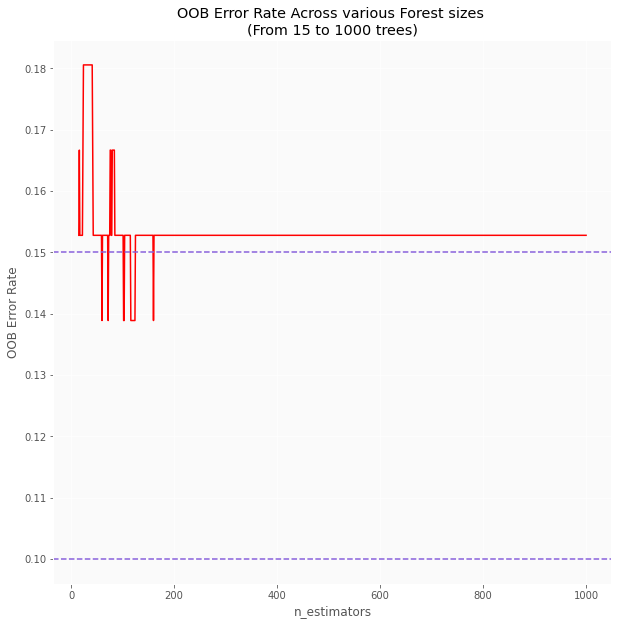

In [15]:
## test_size = 0.25, cv=5

fig, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',
                color = 'red')
plt.axhline(0.15, 
            color='#875FDB',
           linestyle='--')
plt.axhline(0.1, 
            color='#875FDB',
           linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

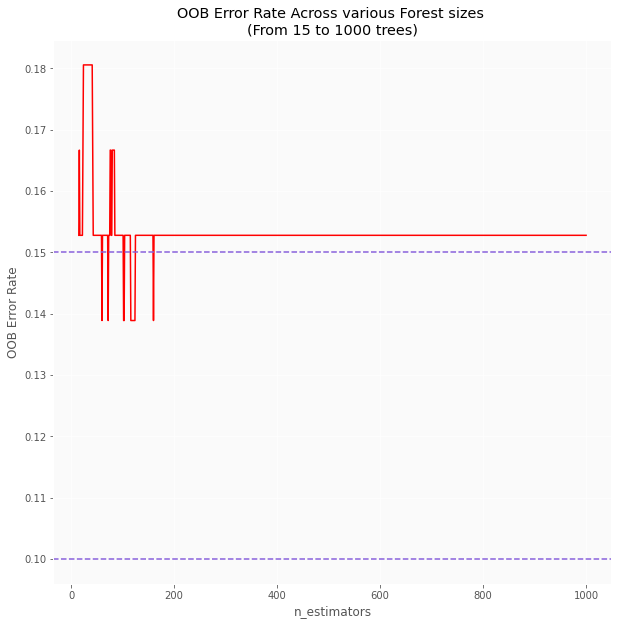

In [16]:
## test_size = 0.2, cv=10 results

fig, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',
                color = 'red')
plt.axhline(0.15, 
            color='#875FDB',
           linestyle='--')
plt.axhline(0.1, 
            color='#875FDB',
           linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

In [17]:
fit_rf.set_params(n_estimators=400,
                  bootstrap = True,
                  warm_start=False, 
                  oob_score=False)

RandomForestClassifier(max_depth=3, max_features=None, n_estimators=400,
                       random_state=42)

In [18]:
fit_rf.fit(X_train, y_train.values.ravel())

RandomForestClassifier(max_depth=3, max_features=None, n_estimators=400,
                       random_state=42)

In [19]:
def variable_importance(fit):
    """
    Purpose
    ----------
    Checks if model is fitted CART model then produces variable importance
    and respective indices in dictionary.

    Parameters
    ----------
    * fit:  Fitted model containing the attribute feature_importances_

    Returns
    ----------
    Dictionary containing arrays with importance score and index of columns
    ordered in descending order of importance.
    """
    try:
        if not hasattr(fit, 'fit'):
            return print("'{0}' is not an instantiated model from scikit-learn".format(fit)) 

        # Captures whether the model has been trained
        if not vars(fit)["estimators_"]:
            return print("Model does not appear to be trained.")
    except KeyError:
        print("Model entered does not contain 'estimators_' attribute.")

    importances = fit.feature_importances_
    indices = np.argsort(importances)[::-1]
    return {'importance': importances,
            'index': indices}

In [20]:
var_imp_rf = variable_importance(fit_rf)

importances_rf = var_imp_rf['importance']

indices_rf = var_imp_rf['index']

In [21]:
print (var_imp_rf)

{'importance': array([0.01191774, 0.00415663, 0.00933035, 0.03657951, 0.01251231,
       0.0025986 , 0.00199167, 0.01668462, 0.00951328, 0.01458483,
       0.00484697, 0.00146992, 0.00359076, 0.00250324, 0.01568104,
       0.00363115, 0.01249611, 0.01645755, 0.00386561, 0.06467869,
       0.00313589, 0.02682205, 0.1414163 , 0.03390382, 0.00227929,
       0.00478335, 0.00281897, 0.08436508, 0.00613717, 0.0229434 ,
       0.00335636, 0.02769689, 0.00173216, 0.00481743, 0.01492208,
       0.0050625 , 0.01793705, 0.02230369, 0.01278669, 0.01287055,
       0.00480801, 0.00450154, 0.00203383, 0.09377202, 0.01010444,
       0.00768225, 0.01099064, 0.00960747, 0.01129105, 0.00200688,
       0.02295984, 0.00310289, 0.00504662, 0.01132332, 0.00332753,
       0.00665005, 0.00095649, 0.00221019, 0.01479483, 0.00108609,
       0.0003703 , 0.02943459, 0.00230672, 0.00441993, 0.00069599,
       0.00434097, 0.        , 0.00350093, 0.00850968, 0.00444358,
       0.00092271, 0.00206614, 0.00130777, 0.00

In [22]:
def print_var_importance(importance, indices, name_index):
    """
    Purpose
    ----------
    Prints dependent variable names ordered from largest to smallest
    based on information gain for CART model.
    Parameters
    ----------
    * importance: Array returned from feature_importances_ for CART
                models organized by dataframe index
    * indices: Organized index of dataframe from largest to smallest
                based on feature_importances_
    * name_index: Name of columns included in model

    Returns
    ----------
    Prints feature importance in descending order
    """
    print("Feature ranking:")

    for f in range(0, indices.shape[0]):
        i = f
        print("{0}. The feature '{1}' has a Mean Decrease in Impurity of {2:.5f}"
              .format(f + 1,
                      name_index[indices[i]],
                      importance[indices[f]]))

In [23]:
print (input_df.columns[1:])

Index(['G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11',
       'G12', 'G13', 'G14', 'G15', 'G16', 'G17', 'G18', 'G19', 'G20', 'G21',
       'G22', 'G23', 'G24', 'G25', 'G26', 'G27', 'G28', 'G29', 'G30', 'G31',
       'G32', 'G33', 'G34', 'G35', 'G36', 'G37', 'G38', 'G39', 'G40', 'G41',
       'G42', 'G43', 'G44', 'G45', 'G46', 'G47', 'G48', 'G49', 'G50', 'G51',
       'G52', 'G53', 'G54', 'G55', 'G56', 'G57', 'G58', 'G59', 'G60', 'G61',
       'G62', 'G63', 'G64', 'G65', 'G66', 'G67', 'G68', 'G69', 'G70', 'G71',
       'G72', 'G73', 'G74', 'G75', 'G76'],
      dtype='object')


In [24]:
# For later use in CART models
names_index = input_df.columns[1:]

In [25]:
print_var_importance(importances_rf, indices_rf, names_index)

Feature ranking:
1. The feature 'G23' has a Mean Decrease in Impurity of 0.14142
2. The feature 'G44' has a Mean Decrease in Impurity of 0.09377
3. The feature 'G28' has a Mean Decrease in Impurity of 0.08437
4. The feature 'G20' has a Mean Decrease in Impurity of 0.06468
5. The feature 'G4' has a Mean Decrease in Impurity of 0.03658
6. The feature 'G24' has a Mean Decrease in Impurity of 0.03390
7. The feature 'G62' has a Mean Decrease in Impurity of 0.02943
8. The feature 'G32' has a Mean Decrease in Impurity of 0.02770
9. The feature 'G22' has a Mean Decrease in Impurity of 0.02682
10. The feature 'G51' has a Mean Decrease in Impurity of 0.02296
11. The feature 'G30' has a Mean Decrease in Impurity of 0.02294
12. The feature 'G38' has a Mean Decrease in Impurity of 0.02230
13. The feature 'G37' has a Mean Decrease in Impurity of 0.01794
14. The feature 'G8' has a Mean Decrease in Impurity of 0.01668
15. The feature 'G18' has a Mean Decrease in Impurity of 0.01646
16. The feature 'G1

In [26]:
def cross_val_metrics(fit, training_set, class_set, estimator, print_results = True, n_splits=10):
    """
    Purpose
    ----------
    Function helps automate cross validation processes while including 
    option to print metrics or store in variable

    Parameters
    ----------
    fit: Fitted model 
    training_set:  Data_frame containing 80% of original dataframe
    class_set:     data_frame containing the respective target vaues 
                      for the training_set
    print_results: Boolean, if true prints the metrics, else saves metrics as 
                      variables

    Returns
    ----------
    scores.mean(): Float representing cross validation score
    scores.std() / 2: Float representing the standard error (derived
                from cross validation score's standard deviation)
    """
    my_estimators = {
    'rf': 'estimators_',
    'nn': 'out_activation_',
    'knn': '_fit_method'
    }
    try:
        # Captures whether first parameter is a model
        if not hasattr(fit, 'fit'):
            return print("'{0}' is not an instantiated model from scikit-learn".format(fit)) 

        # Captures whether the model has been trained
        if not vars(fit)[my_estimators[estimator]]:
            return print("Model does not appear to be trained.")

    except KeyError as e:
        print("'{0}' does not correspond with the appropriate key inside the estimators dictionary. \
\nPlease refer to function to check `my_estimators` dictionary.".format(estimator))
        raise

    n = KFold(n_splits, shuffle=True, random_state=42)
    scores = cross_val_score(fit, 
                         training_set, 
                         class_set, 
                         cv = n)
    if print_results:
        for i in range(0, len(scores)):
            print("Cross validation run {0}: {1: 0.3f}".format(i, scores[i]))
        print("Accuracy: {0: 0.3f} (+/- {1: 0.3f})"\
              .format(scores.mean(), scores.std() / 2))
       
        
    else:
        return scores.mean(), scores.std() / 2

In [27]:
cross_val_metrics(fit_rf, 
                  X_train, 
                  y_train.values.ravel(), 
                  'rf',
                  print_results = True, n_splits=5)

Cross validation run 0:  0.867
Cross validation run 1:  0.933
Cross validation run 2:  0.786
Cross validation run 3:  0.929
Cross validation run 4:  0.786
Accuracy:  0.860 (+/-  0.033)


In [28]:
def create_conf_mat(test_class_set, predictions):
    """Function returns confusion matrix comparing two arrays"""
    if (len(test_class_set.shape) != len(predictions.shape) == 1):
        return print('Arrays entered are not 1-D.\nPlease enter the correctly sized sets.')
    elif (test_class_set.shape != predictions.shape):
        return print('Number of values inside the Arrays are not equal to each other.\nPlease make sure the array has the same number of instances.')
    else:
        # Set Metrics
        test_crosstb_comp = pd.crosstab(index = test_class_set,
                                        columns = predictions)
        # Changed for Future deprecation of as_matrix
        test_crosstb = test_crosstb_comp.values
        return test_crosstb

In [29]:
y_pred = fit_rf.predict(X_test)

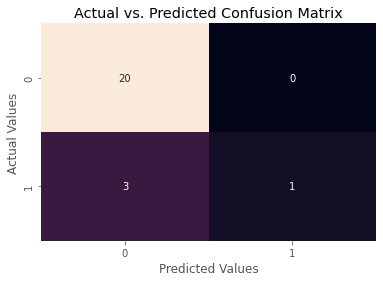

In [30]:
conf_mat = create_conf_mat(y_test.values.ravel(), y_pred.ravel())
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

In [31]:
accuracy_rf = fit_rf.score(X_test, y_test)

print("Here is our mean accuracy on the test set:\n {0:.3f}"\
      .format(accuracy_rf))

Here is our mean accuracy on the test set:
 0.875


In [32]:
# Here we calculate the test error rate!
test_error_rate_rf = 1 - accuracy_rf
print("The test error rate for our model is:\n {0: .4f}"\
      .format(test_error_rate_rf))

The test error rate for our model is:
  0.1250


In [33]:
def print_class_report(y_pred, y_test, alg_name):
    """
    Purpose
    ----------
    Function helps automate the report generated by the
    sklearn package. Useful for multiple model comparison

    Parameters:
    ----------
    predictions: The predictions made by the algorithm used
    alg_name: String containing the name of the algorithm used
    
    Returns:
    ----------
    Returns classification report generated from sklearn. 
    """
    print('Classification Report for {0}:'.format(alg_name))
    print(classification_report(y_pred, 
            y_test))

In [34]:
class_report = print_class_report( y_test, y_pred, 'Random Forest')


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        20
           1       1.00      0.25      0.40         4

    accuracy                           0.88        24
   macro avg       0.93      0.62      0.67        24
weighted avg       0.89      0.88      0.84        24



In [35]:
# We grab the second array from the output which corresponds to
# to the predicted probabilites of positive classes 
# Ordered wrt fit.classes_ in our case [0, 1] where 1 is our positive class
predictions_prob = fit_rf.predict_proba(X_test)[:, 1]

fpr2, tpr2, _ = roc_curve(y_test, predictions_prob, pos_label = 1)

In [36]:
auc_rf = auc(fpr2, tpr2)

In [37]:
def plot_roc_curve(fpr, tpr, auc, estimator, xlim=None, ylim=None):
    """
    Purpose
    ----------
    Function creates ROC Curve for respective model given selected parameters.
    Optional x and y limits to zoom into graph

    Parameters
    ----------
    * fpr: Array returned from sklearn.metrics.roc_curve for increasing
            false positive rates
    * tpr: Array returned from sklearn.metrics.roc_curve for increasing
            true positive rates
    * auc: Float returned from sklearn.metrics.auc (Area under Curve)
    * estimator: String represenation of appropriate model, can only contain the
    following: ['knn', 'rf', 'nn']
    * xlim: Set upper and lower x-limits
    * ylim: Set upper and lower y-limits
    """
    my_estimators = {'knn': ['Kth Nearest Neighbor', 'deeppink'],
              'rf': ['Random Forest', 'red'],
              'nn': ['Neural Network', 'purple']}

    try:
        plot_title = my_estimators[estimator][0]
        color_value = my_estimators[estimator][1]
    except KeyError as e:
        print("'{0}' does not correspond with the appropriate key inside the estimators dictionary. \
\nPlease refer to function to check `my_estimators` dictionary.".format(estimator))
        raise

    fig, ax = plt.subplots(figsize=(5, 5))
    ax.set_facecolor('#fafafa')

    plt.plot(fpr, tpr,
             color=color_value,
             linewidth=1)
    plt.title('ROC Curve For {0} (AUC = {1: 0.3f})'\
              .format(plot_title, auc))

    plt.plot([0, 1], [0, 1], lw=2) # Add Diagonal line
    plt.plot([0, 0], [1, 0], lw=2, color = 'black')
    plt.plot([1, 0], [1, 1], lw=2, color = 'black')
    if xlim is not None:
        plt.xlim(*xlim)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    plt.close()

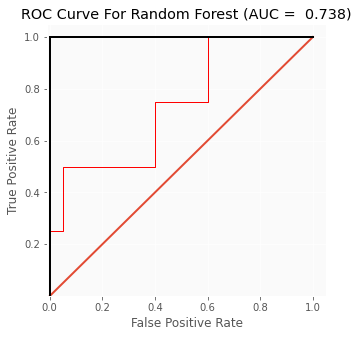

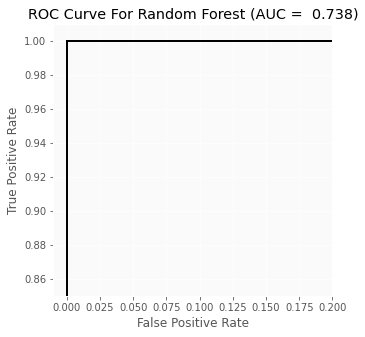

In [38]:
plot_roc_curve(fpr2, tpr2, auc_rf, 'rf',
               xlim=(-0.01, 1.05), 
               ylim=(0.001, 1.05))

plot_roc_curve(fpr2, tpr2, auc_rf, 'rf', 
               xlim=(-0.01, 0.2), 
               ylim=(0.85, 1.01))